In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
csv_path="./Lipstick.csv"

In [97]:
df=pd.read_csv(csv_path)

In [98]:
df.head()

,Id,Age,Income,Gender,Ms,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes


In [99]:
df['Age']

0       <21
1       <21
2     21-35
3       >35
4       >35
5       >35
6     21-35
7       <21
8       <21
9       >35
10      <21
11    21-35
12    21-35
13      >35
Name: Age, dtype: object

In [100]:
# df['Age']=df['Age'].replace({"<21":"Young","21-35":"Adult",">35":"Old"})

In [101]:
df=df.drop('Id',axis=1)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     14 non-null     object
 1   Income  14 non-null     object
 2   Gender  14 non-null     object
 3   Ms      14 non-null     object
 4   Buys    14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [103]:
df.describe()

,Age,Income,Gender,Ms,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Male,Single,Yes
freq,5,6,7,7,9


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X=pd.get_dummies(df.drop('Buys',axis=1),drop_first=True)
y=df['Buys']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [107]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [108]:
model = DecisionTreeClassifier()

In [109]:
model.fit(X,y)

DecisionTreeClassifier()

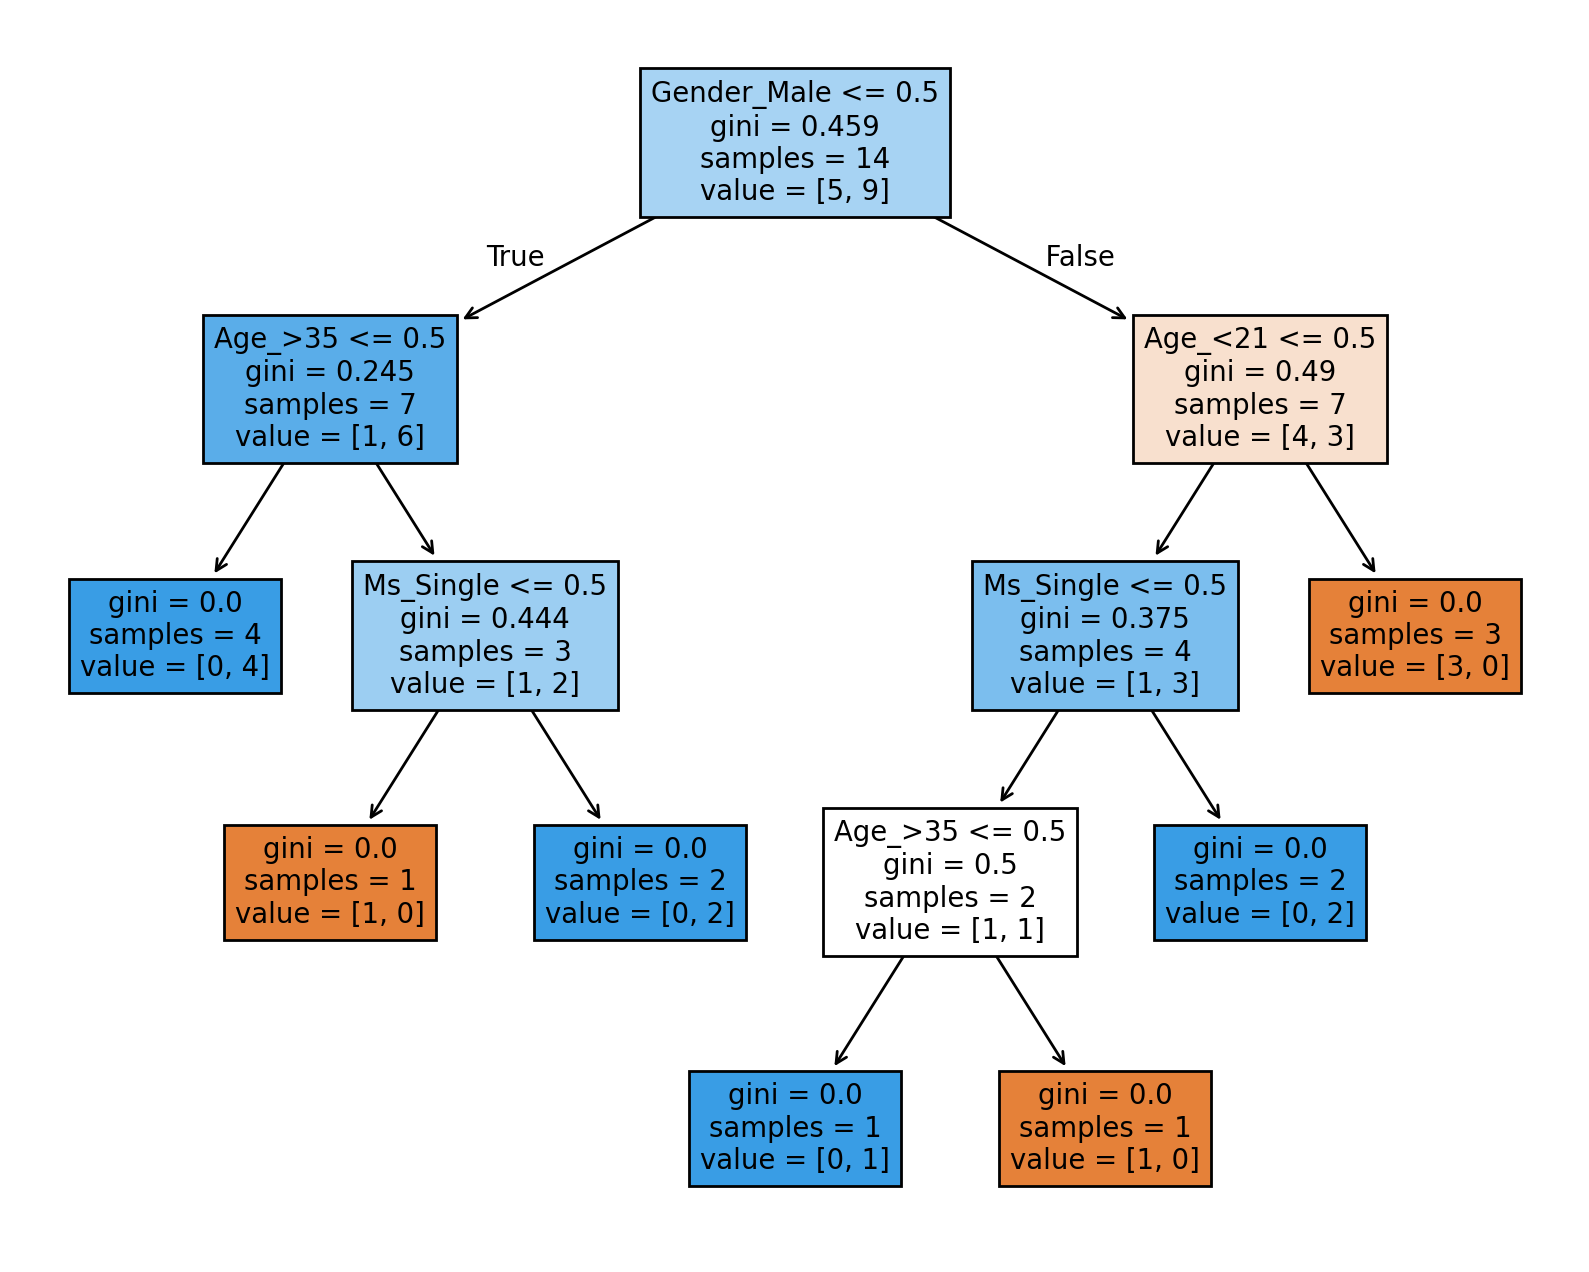

In [110]:
plt.figure(figsize=(10,8),dpi=200)
plot_tree(model,feature_names=X.columns,filled=True);

In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [112]:
y_pred=model.predict(X_test)

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [114]:
confusion_matrix(y_test,y_pred)

array([[1, 0],
       [0, 4]])

In [115]:
test_1 = pd.DataFrame([{
    "Age": "<21",
    "Income": "Low",
    "Gender": "Female",
    "Marital Status": "Married"
}])

In [116]:
sample_X = pd.get_dummies(test_1)
for col in X.columns:
    if col not in sample_X.columns:
        sample_X[col] = 0
sample_X = sample_X[X.columns]   # Arrange in order

print(model.predict(sample_X))

['Yes']


In [117]:
test_2 = pd.DataFrame([{
    "Age": ">35",
    "Income": "Medium",
    "Gender": "Female",
    "Marital Status": "Married"
}])

In [118]:
sample_X = pd.get_dummies(test_2)
for col in X.columns:
    if col not in sample_X.columns:
        sample_X[col] = 0
sample_X = sample_X[X.columns]   # Arrange in order

print(model.predict(sample_X))

['No']


In [119]:
test_3 = pd.DataFrame([{
    "Age": "21-35",
    "Income": "Low",
    "Gender": "Male",
    "Marital Status": "Married"
}])

In [120]:
sample_X = pd.get_dummies(test_3)
for col in X.columns:
    if col not in sample_X.columns:
        sample_X[col] = 0
sample_X = sample_X[X.columns]   # Arrange in order

print(model.predict(sample_X))

['Yes']
